<a href="https://colab.research.google.com/github/OsvaldoUfla/GCC218-beecrowd-2372-Reuniao/blob/main/07_03_Floyd_Warshall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmo de Floyd-Warshall

## Motivação

[beecrowd | 1454 - O País das Bicicletas](https://www.beecrowd.com.br/judge/pt/problems/view/1454)

Como você já deve saber, a bicicleta é um dos meios de transportes mais populares da China. Quase todos os chineses possuem a sua, e utilizam-na para trabalho, recreação, e outras atividades.

Após muitos anos pedalando, Mr. Lee já não têm a mesma disposição para encarar as diversas subidas da cidade onde mora. E a cidade em que Mr. Lee vive é extremamente montanhosa. Por razões sentimentais, ele não quer mudar para uma cidade mais plana. Resolveu, então, que tentaria evitar grandes altitudes em seus caminhos mesmo que, para isso, tivesse que pedalar um pouco mais.

Mr. Lee obteve com o serviço topográfico chinês uma coleção de mapas de sua cidade, em que cada rua desses mapas possui a informação da maior altitude encontrada quando trafegada. Tudo que ele precisa fazer agora é determinar rotas que minimizem a altura percorrida entre pares (origem, destino).

Sabendo que você planeja visitar a cidade em que ele mora no próximo ano, Mr. Lee pediu sua ajuda. Em uma primeira etapa, ele deseja que você implemente um programa que receba mapas topográficos da cidade e uma coleção de pares (origem, destino). Para cada par, seu programa deve imprimir a maior altura encontrada em uma rota entre a origem e o destino. Lembre-se que as rotas devem minimizar tais alturas. As rotas propriamente ditas, serão determinadas em uma segunda etapa (quando você chegar à China para visitá-lo).

Como o transporte utilizado é uma bicicleta, você pode considerar que todas as ruas da cidade são de mão dupla. Não demore, pois Mr. Lee conta com você. :-)



### Entrada
Seu programa deve estar preparado para trabalhar com diversos mapas, doravante denominados instâncias. Cada instância tem a estrutura que segue.

Na primeira linha são fornecidos dois inteiros $n$ ($0 \le n​ \le 100$) e $m$ ($0 \le m \le 4950$) que representam, respectivamente, os números de interseções e de ruas. Por razões de clareza, as interseções são numeradas de $1$ a $n$, inclusive; toda rua começa e termina em uma interseção; e não existem interseções fora das extremidades de uma rua.

Nas próximas m linhas são fornecidos três inteiros: $i$ e $j$ ($1 \le i, j \le n$) que indicam a existência de uma rua entre as interseções $i$ e $j$; e $h$ que representa a maior altitude encontrada quando a rua é trafegada. Esses inteiros estão separados por espaços em branco.

Na linha seguinte, é dado um inteiro $k$ ($1 \le k \le 50$) que representa o número de pares (origem, destino) que serão especificados nas próximas $k$ linhas. Cada par é formado por dois inteiros $i$ e $j$ como acima. Isto é, origem e destino são interseções de ruas, e também estão separados por espaços em branco.

Valores $n = m = 0$ indicam o final das instâncias e não devem ser processados.


### Saída
Para cada instância solucionada, você deverá imprimir um identificador Instancia $h$ em que $h$ é um número inteiro, sequencial e crescente a partir de $1$. Nas próximas $k$ linhas, você deve imprimir as maiores alturas encontradas nas rotas entre os $k$ pares (origem, destino) fornecidos, um valor por linha, na ordem da entrada.

Uma linha em branco deve ser impressa após cada instância.

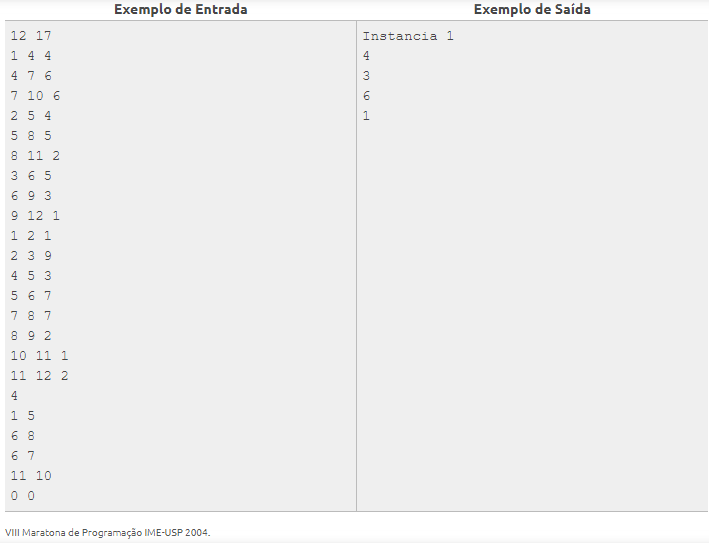

## Implementação

A resolução do  [beecrowd | 1454](https://www.beecrowd.com.br/judge/pt/problems/view/1454) se dá a partir do Algoritmo de Floyd-Warshall. Pode-se modelar o grafo do problema como cada vértice representando as intersecções das ruas, e a altura das ruas como o peso das arestas que ligam as intersecções. 

O número de vértices testados é no máximo $100$. Assim, a utilização do Algoritmo de Floyd-Warshall é apropriada. A solução do problema utiliza a estratégia *minmax*, que consiste em minimizar a altura percorrida no trajeto de *origem* e *destino*, considerando no cálculo a maior altura entre a *origem* a um vértice intermediário, e de tal vértice intermediário ao vértice *destino*.

Mais detalhes sobre o Algoritmo de Floyd-Warshall pode ser visto em [slides](https://drive.google.com/file/d/14hYmR9pJVyekEbnyHy0ePVyN4AoU0VVH/view?usp=sharing) e em [vídeo-aula](https://www.loom.com/share/4364350dce7546f7a4cfc4089de67472).


In [8]:
%%writefile floyd_warshall.cpp
#include<iostream>
#include<vector>
#include<utility>
#include<functional>
using namespace std;

#define INF 1000000000

/*
 * Variaveis globais
 */

// matriz de adjacencia
int** MA;

// quantidade de vertices
int n;

// quantidade de arestas
int m;

// quantidade de pares origem-destino a ser calculado
int k;

void floyd_warshall()
{
    for(int k = 0; k < n; k++)
      for(int i = 0; i < n; i++)
        for(int j = 0; j < n; j++)
          /*
           * Adaptacao: originalmente, o calculo eh MA[i][j] = min(MA[i][j], MA[i][k] + MA[k][j]);
           */
          MA[i][j] = min(MA[i][j], max(MA[i][k], MA[k][j]));
}

int main()
{
    int instancia = 1;
    cin >> n >> m;
    while(n != 0 && m != 0)
    {     
        MA = new int*[n];
        int u, v, h;
     
        for(int i = 0; i < n; i++)
        {
            MA[i] = new int[n];
            for(int j = 0; j < n; j++)
                MA[i][j] = INF;
        }

        for(int i = 0; i < m; i++)
        {
            cin >> u >> v >> h;
            u--;
            v--;
            MA[u][v] = MA[v][u] = h;
        }
     
        floyd_warshall();
     
        int org, dst, k;
        cin >> k;
        cout << "Instancia " << instancia << endl;
        for(int i = 0; i < k; i++)
        {
            cin >> org >> dst;
            org--;
            dst--;
            if(org != dst)
              cout << MA[org][dst] << endl;
         
            else
              cout << 0 << endl;
        }
        instancia++;
        cout << endl;
     
        cin >> n >> m;
    }
 
    return 0;
}

Overwriting floyd_warshall.cpp


*Compilando o código*

In [9]:
%%script bash
g++ floyd_warshall.cpp -o floyd_warshall

*Executando o código*

In [10]:
%%script bash
echo -e "12 17\n1 4 4\n4 7 6\n7 10 6\n2 5 4\n5 8 5\n8 11 2\n3 6 5\n6 9 3\n9 12 1\n1 2 1\n2 3 9\n4 5 3\n5 6 7\n7 8 7\n8 9 2\n10 11 1\n11 12 2\n4\n1 5\n6 8\n6 7\n11 10\n0 0\n" > 01.in
./floyd_warshall < 01.in

Instancia 1
4
3
6
1



### Complexidade

Dado um grafo ponderado $G=(V,E)$, $|V|=n$ e $|E|=m$, a complexidade da nossa implementação se resume em:  

* 3 *loops* de $n$ repetições: a linha *MA[i][j] = min(MA[i][j], max(MA[i][k], MA[k][j]))* possui complexidade de $O(1)$.

Logo, o Algoritmo de Floyd-Warshall terá $O(n^3)$ operações.